# lab7 - word2vec

In [36]:
from pathlib import Path
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

The tasks concentrates on the recent development in representing words as dense vectors in highly dimiensional spaces.

## Tasks

1. Read the documentation of [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) in Gensim library.
2. Download polish word embeddings for word2vec from [Clarin](https://clarin-pl.eu/dspace/handle/11321/327).

In [2]:
data_path = Path("../embeddings/")

if not data_path.exists():
    data_path.mkdir()
    # download to that dir

In [4]:
model = KeyedVectors.load_word2vec_format(data_path / "skipgram"/"skip_gram_v100m8.w2v.txt", binary=False)

In [20]:
words = [w.split("::") for w in model.vocab.keys()]

In [21]:
def in_vocab(word):
    return [w for w in words if word in w[0]]

3. Using the downloaded model find the most similar word or expressions for the following expressions:

a) sąd wysoki

In [9]:
model.most_similar(["sąd::noun", "wysoki::adj"])

[('niski::adj', 0.8020479679107666),
 ('sędzia::noun', 0.7290623188018799),
 ('bowiem::conj', 0.7081355452537537),
 ('ne#Mary_Ryan::noun', 0.7054499387741089),
 ('zaś::conj', 0.7033332586288452),
 ('uznaw::noun', 0.6843103766441345),
 ('wówczas::adv', 0.6842101216316223),
 ('ne#Sero-Rom::noun', 0.6833614110946655),
 ('trybunał::noun', 0.6831938028335571),
 ('alguacila::noun', 0.6808874607086182)]

b) trybunał konstytucyjny

In [10]:
model.most_similar(["trybunał::noun", "konstytucyjny::adj"])

[('władza_sądownicza::noun', 0.839540958404541),
 ('parlament::noun', 0.8111734986305237),
 ('konstytucja::noun', 0.8090874552726746),
 ('ne#Trybunału::noun', 0.8031018972396851),
 ('bunałem::adj', 0.801645040512085),
 ('ustawa_zasadnicza::noun', 0.7985743880271912),
 ('władza_ustawodawcza::noun', 0.7971197366714478),
 ('ne#ETPC::noun', 0.7954705953598022),
 ('sądowniczy::adj', 0.7941318154335022),
 ('ne#Trybunał_Administracyjny::noun', 0.7935019731521606)]

c) kodeks cywilny

In [11]:
model.most_similar(["kodeks::noun", "cywilny::adj"])

[('przepis::noun', 0.7248944044113159),
 ('prawny::adj', 0.6942465305328369),
 ('busido::noun', 0.6904403567314148),
 ('ne#Kodeksy::noun', 0.6699978113174438),
 ('cywiln::noun', 0.6666579246520996),
 ('ne#Kodeks::noun', 0.6659103035926819),
 ('deksem::adv', 0.6633964776992798),
 ('prawo_karne::noun', 0.6610199213027954),
 ('wojskowy::adj', 0.6570290327072144),
 ('podstępować::noun', 0.6524724960327148)]

d) kpk

In [12]:
model.most_similar(["kpk::noun"])

[('ne#Kodeksu_postępowania_karnego::noun', 0.8661121129989624),
 ('kpk::adj', 0.8617311120033264),
 ('kpc::noun', 0.8536956310272217),
 ('kk::noun', 0.8311821818351746),
 ('ppsa::noun', 0.8293906450271606),
 ('ne#KPC::noun', 0.8081650733947754),
 ('ne#Kodeksu_postępowania_w_sprawach_o_wykroczenia::noun',
  0.8027453422546387),
 ('ne#Kpa::noun', 0.7999780178070068),
 ('kpow::noun', 0.7975168228149414),
 ('1kpk::adj', 0.7967638373374939)]

e) sąd rejonowy

In [13]:
model.most_similar(["sąd::noun", "rejonowy::adj"])

[('sąd_okręgowy::noun', 0.8236081600189209),
 ('trybunał::noun', 0.7828972935676575),
 ('okręgowy::adj', 0.7680913209915161),
 ('sąd_apelacyjny::noun', 0.7675423622131348),
 ('asesoria::noun', 0.7622843980789185),
 ('sąd_grodzki::noun', 0.7618423700332642),
 ('apelacyjny::adj', 0.7599995136260986),
 ('arbitraż_społeczny::noun', 0.7554223537445068),
 ('ne#Rejonowego::noun', 0.7554162740707397),
 ('ne#Sądu::noun', 0.7551901340484619)]

f) szkoda

In [14]:
model.most_similar(["szkoda::noun"])

[('wyrządzić::verb', 0.7564010620117188),
 ('Krzywda::noun', 0.7515829205513),
 ('strata::noun', 0.7275083065032959),
 ('nieszczęście::noun', 0.7267874479293823),
 ('obawiać_się::verb', 0.7152366042137146),
 ('pożytek::noun', 0.7028508186340332),
 ('żałować::verb', 0.7016452550888062),
 ('korzyść::noun', 0.6929348707199097),
 ('skutek::noun', 0.691055178642273),
 ('przypuszczać::verb', 0.6901097297668457)]

g) wypadek

In [15]:
model.most_similar(["wypadek::noun"])

[('przypadek::noun', 0.8552336692810059),
 ('okoliczność::noun', 0.8122090697288513),
 ('skutek::noun', 0.7716400027275085),
 ('sytuacja::noun', 0.761337161064148),
 ('zdarzenie::noun', 0.7389098405838013),
 ('zapewne::qub', 0.7356680631637573),
 ('przyczyna::noun', 0.7271959781646729),
 ('wydarzenie::noun', 0.7241967916488647),
 ('prawdopodobnie::adv', 0.7228392958641052),
 ('jednakże::qub', 0.7212308049201965)]

h) kolizja

In [16]:
model.most_similar(["kolizja::noun"])

[('kolizja_drogowa::noun', 0.8072466850280762),
 ('kolizj::noun', 0.7978355288505554),
 ('wypadek_drogowy::noun', 0.7862640619277954),
 ('zderzenie::noun', 0.7812461256980896),
 ('zderzenie_czołowe::noun', 0.7508682608604431),
 ('kraksa::noun', 0.7374911308288574),
 ('stłuczka::noun', 0.7361664175987244),
 ('drogowyc::noun', 0.7356817126274109),
 ('zdarzać::noun', 0.7281510829925537),
 ('awaria::noun', 0.7276297807693481)]

i) szkoda majątkowy

In [17]:
model.most_similar(["szkoda::noun", "majątkowy::adj"])

[('wyrządzo::noun', 0.7681843638420105),
 ('majątek::noun', 0.7525126934051514),
 ('ne#interesom_Państwa_Polskiego::noun', 0.7254406809806824),
 ('dowawczej::adj', 0.7123303413391113),
 ('biercy::noun', 0.7121618390083313),
 ('wyrzą::noun', 0.7055915594100952),
 ('emergens::noun', 0.70549476146698),
 ('niemajątkowy::adj', 0.7042748928070068),
 ('wyrządzić::verb', 0.7024750709533691),
 ('Krzywda::noun', 0.7019929885864258)]

j) nieszczęście

In [18]:
model.most_similar(["nieszczęście::noun"])

[('niebezpieczeństwo::noun', 0.7715556621551514),
 ('klęska::noun', 0.7639137506484985),
 ('zguba::noun', 0.7612302303314209),
 ('zgryzota::noun', 0.7591318488121033),
 ('Krzywda::noun', 0.7577098608016968),
 ('strapienie::noun', 0.756998598575592),
 ('niedola::noun', 0.7511889934539795),
 ('los::noun', 0.7467725276947021),
 ('nieszczęśliwy::adj', 0.7430395483970642),
 ('utrapienie::noun', 0.7418053150177002)]

k) rozwód   

In [19]:
model.most_similar(["rozwód::noun"])

[('małżeństwo::noun', 0.8230218291282654),
 ('rozwodowy::adj', 0.8101382255554199),
 ('rozwiedziony::adj', 0.7854081392288208),
 ('rozwieść_się::verb', 0.7774686217308044),
 ('rozwieść::verb', 0.7737049460411072),
 ('małżeńśtwa::noun', 0.7710735201835632),
 ('rozwiedzeni::noun', 0.7502768039703369),
 ('konkubinat::noun', 0.7491039633750916),
 ('rozwódka::noun', 0.7407065033912659),
 ('ne#Katarzyną_Aragońską::noun', 0.7383209466934204)]

4. Find the result of the following equations (5 top results):

a) sąd wysoki - kpc + konstytucja

In [22]:
model.most_similar(["sąd::noun", "wysoki::adj", "konstytucja::noun"], ["kpc::noun"])[:5]

[('rząd::noun', 0.7304977178573608),
 ('niski::adj', 0.7043129205703735),
 ('władza::noun', 0.6805161237716675),
 ('urząd::noun', 0.6599117517471313),
 ('stanowisko::noun', 0.655288815498352)]

b) pasażer - mężczyzna + kobieta

In [23]:
model.most_similar(["pasażer::noun", "kobieta::noun"], ["mężczyzna::noun"])[:5]

[('podróżny::noun', 0.8415741920471191),
 ('współpasażer::noun', 0.7920055985450745),
 ('podróżujący::noun', 0.7550978660583496),
 ('kierowca::noun', 0.7446858286857605),
 ('bagażowy::noun', 0.7316379547119141)]

c) samochód - droga + rzeka
   

In [24]:
model.most_similar(["samochód::noun", "rzeka::noun"], ["droga::noun"])[:5]

[('motorówka::noun', 0.7439929842948914),
 ('jezioro::noun', 0.7345262765884399),
 ('Łódź::noun', 0.7254728078842163),
 ('ne#Helensburgha::noun', 0.7246426343917847),
 ('ne#East_River::noun', 0.7199318408966064)]

5. Using the [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) 
   algorithm comput the projection of the random 1000 words with the following words highlighted
   (assuming they are available):
   
a) szkoda
  
b) strata

c) uszczerbek

d) szkoda majątkowy

e) uszczerbek na zdrowie

f) krzywda
   
g) niesprawiedliwość
   
h) nieszczęście

In [38]:
np.random.seed(0)

selected_vecs = {
    "szkoda": model["szkoda::noun"],
    "strata": model["strata::noun"],
    "uszczerbek": model["uszczerbek::noun"],
    "szkoda majątkowa": model["szkoda_majątkowa::noun"],
    "uszczerbek na zdrowiu": model["uszczerbek::noun"] + model["na::prep"] + model["zdrowie::noun"],
    "krzywda": model["krzywde::noun"],
    "niesprawiedliwość": model["niesprawiedliwość::noun"],
    "nieszczęście": model["nieszczęście::noun"]
}

random_vecs = {
    key: model[key]
    for key in np.random.choice(list(model.vocab.keys()), 1000)
}

vecs = list(selected_vecs.items()) + list(random_vecs.items())

In [39]:
vecs_transformed = TSNE(n_components=2).fit_transform([v[1] for v in vecs])

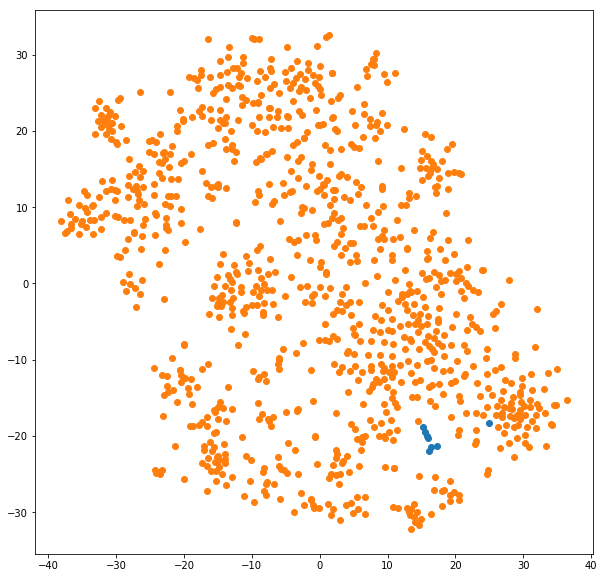

In [44]:
plt.figure(figsize=(10, 10))


plt.scatter(vecs_transformed[:len(selected_vecs),0], vecs_transformed[:len(selected_vecs), 1])
plt.scatter(vecs_transformed[len(selected_vecs):,0], vecs_transformed[len(selected_vecs):, 1])

## Hints

1. Read the classic articles:
   * [Distributed Representations of Words and Phrases and their Compositionality](http://papers.nips.cc/paper/5021-distributed-representations-of-words-andphrases)
   * [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)
1. The word2vec algorithm uses two variants:
   1. CBOW - using the context words, the central word is predicted
   1. skip-gram - using the central word, the context words are predicted
1. The word2vec algorithm is pretty efficient. It can process a corpus containing 1 billion words in one day.
1. The vectors provided by the algorithm reflect some of the semantic and syntactic features of the represented
   words. E.e. the following equation should work in the vector space:
   `w2v("król") - w2v("mężczyzna") + w2v("kobieta") = w2v("królowa")`